# BreakPad_Pressure_distribution_using_ML

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\BreakPads_ML\Raw_Input_Data\Design1.csv")

In [3]:
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])

In [4]:
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
df.head()

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,2.57188,2.30037,2.46050,2.65304,2.81205,2.75852,2.66240,2.46821,2.30057,2.56229,...,1.72637,1.72359,1.81010,Design_1,7.5,29.3,86.8,15,100,50.0
1,3.16330,2.76536,2.94005,3.17009,3.36315,3.29799,3.18142,2.94898,2.76447,3.15023,...,2.06827,2.06496,2.16817,Design_1,7.5,29.3,86.8,15,100,60.0
2,3.76559,3.22990,3.41703,3.68470,3.91224,3.83530,3.69804,3.42718,3.22778,3.74881,...,2.40960,2.40582,2.52562,Design_1,7.5,29.3,86.8,15,100,70.0
3,4.37665,3.69413,3.89217,4.19759,4.45998,4.37113,4.21299,3.90353,3.69071,4.35597,...,2.75046,2.74624,2.88259,Design_1,7.5,29.3,86.8,15,100,80.0
4,4.99506,4.15829,4.36606,4.70939,5.00690,4.90605,4.72688,4.37863,4.15347,4.97035,...,3.09081,3.08615,3.23906,Design_1,7.5,29.3,86.8,15,100,90.0


In [5]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '881', '882', '883', 'Design', 'Pad_Thickness', 'Pad_Height',
       'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'],
      dtype='object', length=890)

## 1. Check for Missing value

In [6]:
for all in df:
    x=all
    if(pd.isnull(df[x]).any()==False):
        continue
    else:
        print(x+' has null')

### 1.1) check for Duplicates

In [7]:
df.duplicated().value_counts()

False    150
dtype: int64

In [8]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,2.57188,2.30037,2.46050,2.65304,2.81205,2.75852,2.66240,2.46821,2.30057,2.56229,...,1.72637,1.72359,1.81010,Design_1,7.5,29.3,86.8,15,100,50.0
1,3.16330,2.76536,2.94005,3.17009,3.36315,3.29799,3.18142,2.94898,2.76447,3.15023,...,2.06827,2.06496,2.16817,Design_1,7.5,29.3,86.8,15,100,60.0
2,3.76559,3.22990,3.41703,3.68470,3.91224,3.83530,3.69804,3.42718,3.22778,3.74881,...,2.40960,2.40582,2.52562,Design_1,7.5,29.3,86.8,15,100,70.0
3,4.37665,3.69413,3.89217,4.19759,4.45998,4.37113,4.21299,3.90353,3.69071,4.35597,...,2.75046,2.74624,2.88259,Design_1,7.5,29.3,86.8,15,100,80.0
4,4.99506,4.15829,4.36606,4.70939,5.00690,4.90605,4.72688,4.37863,4.15347,4.97035,...,3.09081,3.08615,3.23906,Design_1,7.5,29.3,86.8,15,100,90.0


## 2. EDA(Univariant)

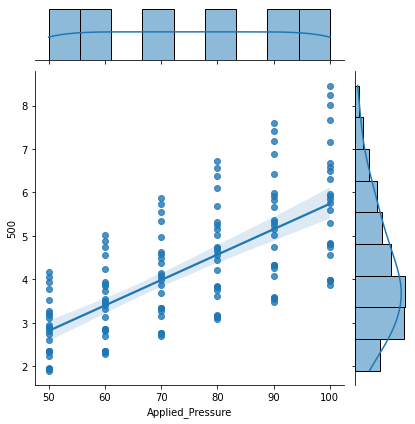

In [10]:
sns.jointplot(x= 'Applied_Pressure',y='500',data=df,kind='reg')

<AxesSubplot:xlabel='Applied_Pressure', ylabel='500'>

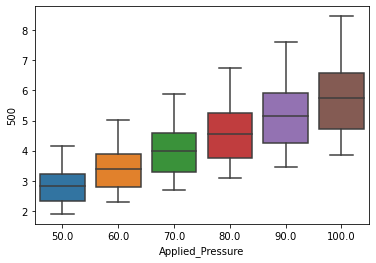

In [112]:
sns.boxplot(x= 'Applied_Pressure',y='500',data=df)

In [23]:
df_2=df.iloc[:,-880]
df_2=df
df_2 = df_2.iloc[:,880:]
df_2 = df_2.drop(columns='Design')

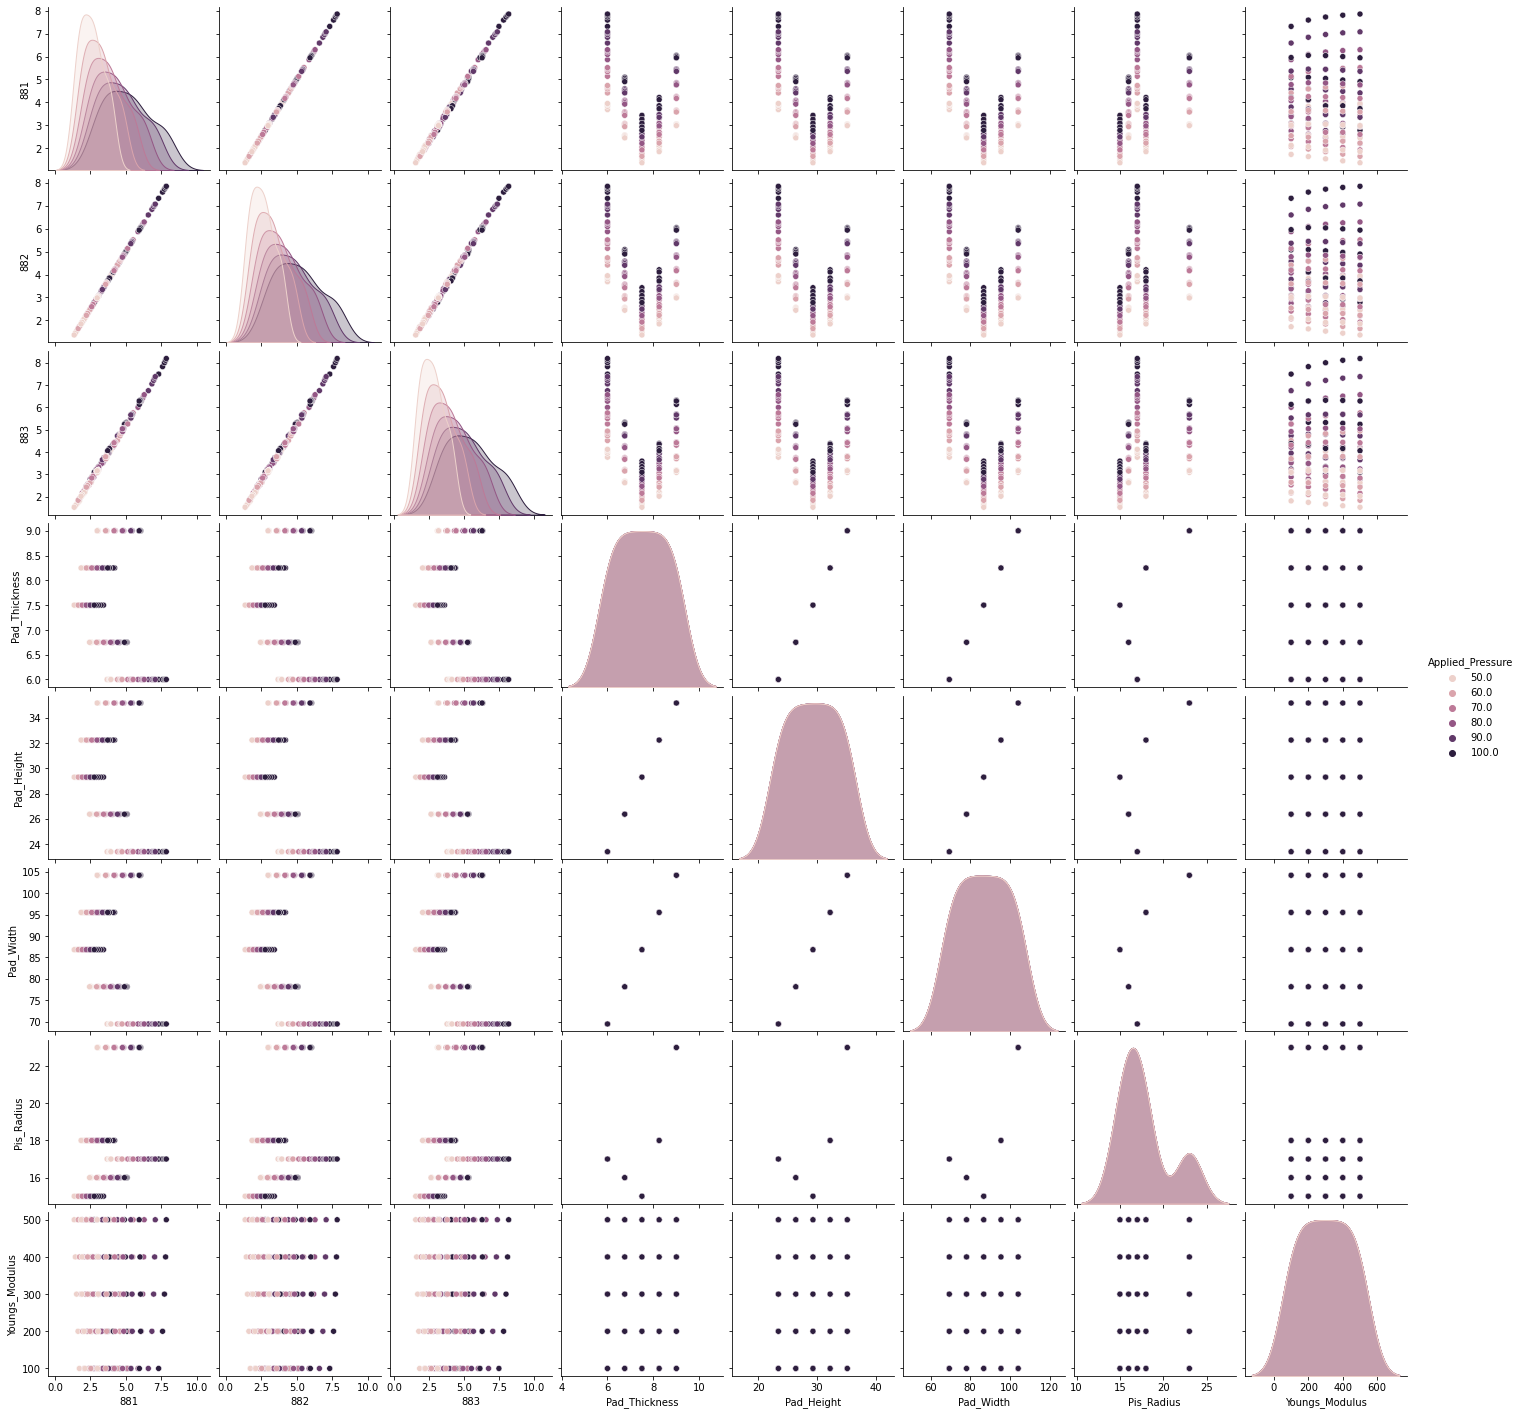

In [24]:
sns.pairplot(df_2,hue='Applied_Pressure')

## 3. Feature Selection

In [52]:
x_features = df[['Pad_Thickness','Pad_Height','Pad_Width','Pis_Radius','Youngs_Modulus','Applied_Pressure']]
y_targets = df.iloc[:,:883]
x_features3
y_targets

,1,2,3,4,5,6,7,8,9,10,...,874,875,876,877,878,879,880,881,882,883
0,2.57188,2.30037,2.46050,2.65304,2.81205,2.75852,2.66240,2.46821,2.30057,2.56229,...,1.50749,2.73289,2.79201,2.81998,2.84751,1.68822,1.71832,1.72637,1.72359,1.81010
1,3.16330,2.76536,2.94005,3.17009,3.36315,3.29799,3.18142,2.94898,2.76447,3.15023,...,1.80557,3.26674,3.33872,3.37299,3.40595,2.02178,2.05845,2.06827,2.06496,2.16817
2,3.76559,3.22990,3.41703,3.68470,3.91224,3.83530,3.69804,3.42718,3.22778,3.74881,...,2.10329,3.79833,3.88338,3.92407,3.96245,2.35454,2.39795,2.40960,2.40582,2.52562
3,4.37665,3.69413,3.89217,4.19759,4.45998,4.37113,4.21299,3.90353,3.69071,4.35597,...,2.40061,4.32837,4.42663,4.47384,4.51763,2.68667,2.73693,2.75046,2.74624,2.88259
4,4.99506,4.15829,4.36606,4.70939,5.00690,4.90605,4.72688,4.37863,4.15347,4.97035,...,2.69747,4.85745,4.96905,5.02284,5.07203,3.01819,3.07538,3.09081,3.08615,3.23906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.69565,4.65226,5.05105,5.38355,5.53332,5.49802,5.39403,5.06573,4.65937,4.68745,...,3.05916,5.47651,5.52773,5.52918,5.54669,3.47644,3.55282,3.57869,3.57322,3.78704
146,5.58157,5.44008,5.87921,6.26379,6.43948,6.39772,6.27584,5.89560,5.44657,5.56986,...,3.56557,6.37247,6.43281,6.43488,6.45474,4.05397,4.14273,4.17243,4.16562,4.41352
147,6.48573,6.22831,6.70329,7.13965,7.34196,7.29344,7.15330,6.72131,6.23388,6.47013,...,4.07197,7.26429,7.33405,7.33699,7.35924,4.63023,4.73149,4.76508,4.75700,5.03859
148,7.40586,7.01669,7.52366,8.01160,8.24117,8.18562,8.02689,7.54326,7.02110,7.38602,...,4.57837,8.15243,8.23189,8.23592,8.26058,5.20535,5.31924,5.35677,5.34751,5.66244


In [39]:
df.dtypes

1                   float64
2                   float64
3                   float64
4                   float64
5                   float64
                     ...   
Pad_Height          float64
Pad_Width           float64
Pis_Radius            int64
Youngs_Modulus        int64
Applied_Pressure    float64
Length: 890, dtype: object